In [1]:
import numpy as np
import pandas as pd

## Activation function

In [2]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_(Z):
    A = 1 / (1 + np.exp(-Z))
    return A*(1-A)

def relu(Z):
    Z[Z<0] = 0
    return Z

def relu_(Z):
    Z[Z<0] = 0
    Z[Z>=0] = 1
    return Z

def leakyRelu(Z):
    Z = Z[Z<0] * 0.01
    return Z

def leakyRelu_(Z):
    Z[Z<0] = 0.01
    Z[Z>=0] = 1
    return Z

def softmax(Z):
    A = np.exp(Z-Z.mean())
    softmax_sum = A.sum()
    return A / softmax_sum

def softmax_(Z):
    A = np.exp(Z-Z.mean())
    softmax_sum = A.sum()
    return A * (softmax_sum - A) / (softmax_sum ** 2)

### Lose function and its derivative

In [33]:
def L_binaryClassfication(A, Y):
    return -(Y * np.log(A) + (1 - Y) * np.log(1 - A))

def L_binaryClassfication_(A, Y):
    return -(Y / (A + 0.1**8) + (1 - Y) / (1 - A + 0.1**8))

def L_regression(A, Y):
    return (A - Y)**2

def L_regression_(A, Y):
    return 2 * (A - Y)

def L_cross_entropy(A, Y):
    return -y*np.log(A)

def L_cross_entropy_(A, Y):
    return -Y/(A + 0.1**8)


### Forward propagation

In [ ]:
def forward(A_prev, W, g):
    Z = W.dot(A_prev) + b
    A= g(Z)
    return Z, A

In [ ]:
def lose(A, Y, l):
    return l(A, Y)

### Backward Propagation

In [ ]:

def backward(A_prev, W, b, Z, g_, dA):
    dA = lose * np.array(list(map(self.loseLdic[self.loseFunction+"_"],
                                  np.array(self.A_list[self.l]).flatten('C'),
                                  np.array(self.y).flatten('C'))),
                         dtype=self.np_dtype
                         ).reshape(self.n_list[self.l], -1)
    dZ = dA * g_(Z)
    dW = dA.dot(A_prev.T)
    db = dA
    dA_prev = W.T.dot(dA)
    return dA_prev, dW, db, dZ

In [ ]:
def initialize_parameters(n):
    l = n.shape[0]
    W = [[]]
    b = [[]]
    Z = [[]]
    A = [[]]
    for i in range(1, l):
        W.append(np.random.rand(n[i], n[i-1]))
        b.append(np.random.rand(n[i]))
        Z.append([])
        A.append([])
    return W, b

In [ ]:
# batch training
def train(getXY, itr, a):
    
    # define net structure and initialize parameters
    n = np.array([A0.size(), 28, 28, 16, 10])
    g = ["", "relu", "relu", "relu", "softmax"]
    W, b, Z, A, dW, db, dZ, dA, = initialize_parameters(n)
    los_func = 'L_cross_entropy'
    
    l = n.shape[0]
    for i in range(0, itr):
        A[0], Y = getXY()
        for j in range(1, l):
            Z[j], A[j] = forward(A[j-1], W[j], b[j], eval([g[j]]))
        
        los = lose(A[l-1], Y, eval(los_func))
        
        dA[l-1] = los * eval(los_func+'_')(A[l-1])
        for j in range(l-1, 0):
            
        
        
        
        
        
        
        
        
        
        
        
       

In [ ]:
def minist_hand_writing():
    train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./../data/', train=True, download=False,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])),
        batch_size=128, shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./../data/', train=False, download=False,
                                   transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                           (0.1307,), (0.3081,))
                                   ])),
        batch_size=1, shuffle=True)

    train_batch = enumerate(train_loader)
    neuralNet = NeuralNet()
    neuralNet.creat_neural_network(28*28, 128)
    neuralNet.debug = True

    for i in range(0, 100):
        batch_idx, (train_imgs, train_labels) = next(train_batch)
        img_shape = np.array(train_imgs).shape

        x = np.array(train_imgs).flatten('C').reshape(img_shape[2]*img_shape[3], -1, order='C')
        y = np.array([np.array(train_labels).tolist()])
        softmax_y = np.zeros((10, y.shape[1]))
        for i in range(0, y.shape[1]):
            softmax_y[y[0, i], i] = 1
        neuralNet.load_data_piece(x, softmax_y)

        with open("train_controlling.json", 'r') as conF:
            conStr = conF.read()
            conJson = json.loads(conStr)

            if conJson["save_weights_itr"] == i:
                neuralNet.save_weights()
            if conJson["continue_learning"] == 1:
                neuralNet.piece_train_network(conJson["batch_itr"], conJson["learning_rate"])
                neuralNet.record_train_acc_softmax()

            else:
                break
            conF.close()

    neuralNet.show_train_dev_loss()
    neuralNet.show_acc()


    for i in range(0, 64):
        cmd = input("========================================================================================")
        if cmd == "save_weigths":
            neuralNet.save_weights()
        elif cmd == "load_weigths":
            date = input("date")
            neuralNet.load_weights(date)
        else:
            y = np.array(neuralNet.y)
            y_hat = np.array(neuralNet.A_list[neuralNet.l][i])
            print(y.argmax(axis=0))
            print(y_hat.argmax(axis=0))

In [43]:
def f(a):
    return a+1
b = eval('f')

In [44]:
b(1)

2

In [7]:
df_x = pd.read_csv("./../data/house_price/test.csv")
df_y = pd.read_csv("./../data/house_price/price.csv")
features = ['MSSubClass', 'LotFrontage', 'LotArea']
x = np.array(df_x[features].T)
y = np.array([np.array(df_y['SalePrice'].T).tolist()])

In [8]:
df_x.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [9]:
df_y.dtypes

Id             int64
SalePrice    float64
dtype: object

In [10]:
print(x)

[[   20.    20.    60. ...    20.    85.    60.]
 [   80.    81.    74. ...   160.    62.    74.]
 [11622. 14267. 13830. ... 20000. 10441.  9627.]]


In [11]:
print(y)

[[169277.0524984  187758.39398877 183583.68356955 ... 219222.42340006
  184924.279659   187741.86665748]]


In [12]:
import numpy as np
y = np.array([[1,2,3,4]])
softmax_y = np.zeros((10, y.shape[1]))

for i in range(0, y.shape[1]):
    softmax_y[y[0,i], i] = 1

print(softmax_y)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
a = [[1,2],[3,4],[5,6]]
b = [[1,2,3,4,5,6]]
print(b[0][1])

2


### plot loss

KeyboardInterrupt: 

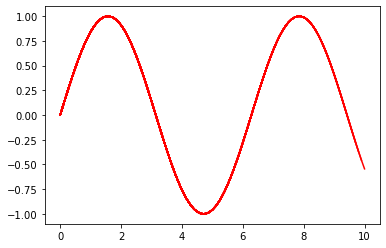

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import time
from math import *
 
plt.ion() #开启interactive mode 成功的关键函数
plt.figure(1)
t = [0]
t_now = 0
m = [sin(t_now)]
 
for i in range(2000):
     t_now = i*0.1
     t.append(t_now)#模拟数据增量流入
     m.append(sin(t_now))#模拟数据增量流入
     plt.plot(t,m,'-r')
     plt.draw()#注意此函数需要调用
     time.sleep(0.01)

In [ ]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
 from IPython import display
 
plt.ion()
 
def plot_durations(y):
 plt.figure(2)
 plt.clf()
 plt.subplot(211)
 plt.plot(y[:,0])
 plt.subplot(212)
 plt.plot(y[:,1])
 
 plt.pause(0.001) # pause a bit so that plots are updated
 if is_ipython:
  display.clear_output(wait=True)
  display.display(plt.gcf())
 
 
x = np.linspace(-10,10,500)
y = []
for i in range(len(x)):
 y1 = np.cos(i/(3*3.14))
 y2 = np.sin(i/(3*3.14))
 y.append(np.array([y1,y2]))
 plot_durations(np.array(y))

In [ ]:
ddP.max(axis=0).repeat(3)

### Save weights
+ np: np.savetxt, np.readtxt 
+ fileIO: write and read list
+ json

In [15]:
np.loadtxt("a.txt", dtype='float64', delimiter=' ') 

OSError: a.txt not found.

In [ ]:
time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

In [ ]:
list_data = [[1,2], [2,2,2],[[1,2],[3,4]]]

open(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) +'data.txt','w').write(str(list_data))


In [ ]:
file = open('data.txt','r') 
a = file.read()

In [ ]:
print(a)

In [ ]:
np.readline

In [ ]:
file = open('others.txt', 'w')
file.writelines(str([[1,2,3], 'function']))

file.close()

In [ ]:
file = open('others.txt', 'r')
arr = file.readlines()
func = file.readlines()
print(list(arr))


##### json 存储weights 

In [ ]:
import json
data = {'a': [1,2,3], 'b':[[1,2],[3,4]], 'c':'adsfa'}
js = json.dumps(data)

In [ ]:
js

In [ ]:
ddd = json.loads(js)

In [ ]:
ddd['a']

In [ ]:
ddd['b']

In [ ]:
ccc = np.array([[1,2,3],[5,5,5]])
print(ccc)
ccc[:,0] = [[9], [9]]
print(ccc)


In [ ]:
print('asdf', 'asdf')

In [ ]:
a = [[1,2,3], [12],"qwer"]

In [ ]:
del a[1:]

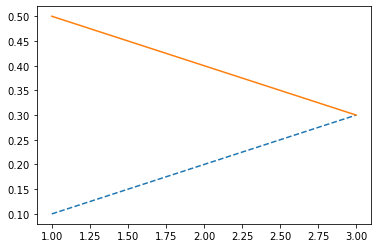

In [21]:
plt.plot([1,2,3],[0.1,0.2,0.3],'--')
plt.plot([1,2,3],[0.5,0.4,0.3],'-')
plt.annotate()
plt.show()

In [23]:
class A:
    m=1
    def aa(self, m = 0):
        print(m)
    
a =A()
a.aa()
a.aa(10)


0
10


In [37]:
a = np.array([[]])
b = np.array([[1]])

In [38]:
print(a.shape)
print(b.shape)


(1, 0)
(1, 1)


In [39]:
print(len(a))
print(len(b))

1
1


In [40]:
len([[],[]])

2

In [17]:
a = np.array([[1,2,3,4],[3,3,3,3]])

In [20]:
(a.argmax(axis=0) == np.array([1,0,1,0])).sum()

2

In [21]:
a = np.zeros((3,4))

In [23]:
b = np.ones((3,1))

In [24]:
print(a)
print(b)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1.]
 [1.]
 [1.]]


In [29]:
a[:,0] = b[:,0]

In [30]:
a

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [28]:
a

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])